In [23]:
!pip install -Uqq fastai

### Installing FastAI libraries

In [24]:
from fastcore.all import *
from fastai.vision.all import *

### Creating a Data Block for Training and Validation

In [25]:
tomatoes = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))
     

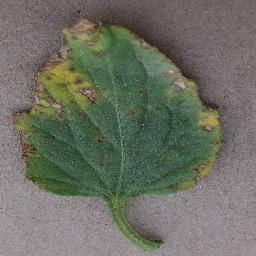

In [33]:
Image.open('/kaggle/input/tomato-diseases/test/bacterial_spot/img_bs_1.jpg').to_thumb(256,256)

In [27]:
path = '/kaggle/input/tomato-diseases/train/'
dls = tomatoes.dataloaders(path)

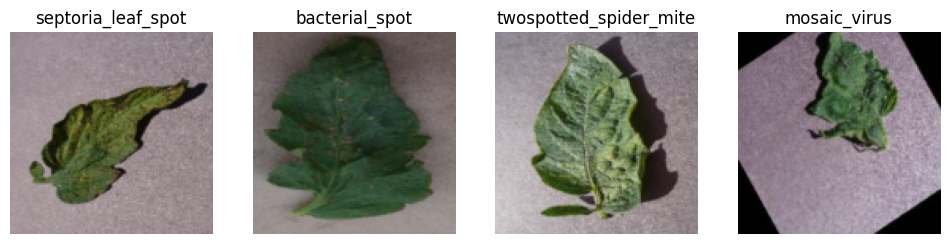

In [37]:
dls.valid.show_batch(max_n=4, nrows=1)

### Training DenseNet121 model 

In [43]:
learn = vision_learner(dls,'densenet121.ra_in1k', metrics=[error_rate,accuracy]).to_fp16()
learn.fine_tune(4)

model.safetensors:   0%|          | 0.00/32.3M [00:00<?, ?B/s]

### Creating Testing set

In [68]:
test_path = '/kaggle/input/tomato-diseases/test/'
test_files = get_image_files(test_path)
test_dl = dls.test_dl(test_files)

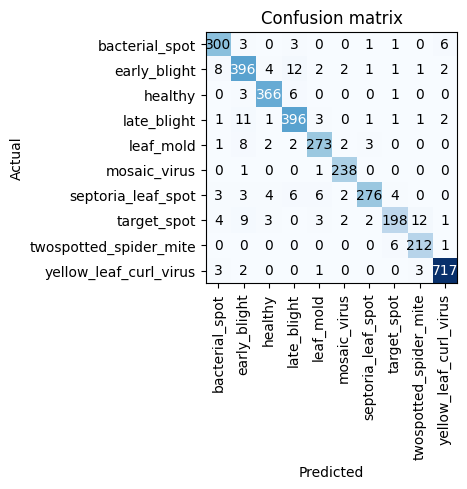

In [69]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [71]:
from glob import glob
test_path = '/kaggle/input/tomato-diseases/test/*'
test_path_g = glob(test_path)


In [72]:
cat_diseases = []
for categories in test_path_g:
    cat_diseases.append(categories+'/*')
  
    

In [73]:
cat_diseases

['/kaggle/input/tomato-diseases/test/late_blight/*',
 '/kaggle/input/tomato-diseases/test/septoria_leaf_spot/*',
 '/kaggle/input/tomato-diseases/test/early_blight/*',
 '/kaggle/input/tomato-diseases/test/twospotted_spider_mite/*',
 '/kaggle/input/tomato-diseases/test/yellow_leaf_curl_virus/*',
 '/kaggle/input/tomato-diseases/test/healthy/*',
 '/kaggle/input/tomato-diseases/test/mosaic_virus/*',
 '/kaggle/input/tomato-diseases/test/bacterial_spot/*',
 '/kaggle/input/tomato-diseases/test/target_spot/*',
 '/kaggle/input/tomato-diseases/test/leaf_mold/*']

In [74]:
disease,_,pred = learn.predict(PILImage.create('/kaggle/input/tomato-diseases/test/leaf_mold/img_lm_10.jpg'))
disease,pred

('leaf_mold',
 tensor([2.3171e-07, 3.4229e-05, 1.2599e-06, 1.8920e-04, 9.9954e-01, 1.2038e-04,
         1.2461e-05, 7.7320e-07, 6.5321e-05, 3.2526e-05]))

In [75]:
correct = 0
total = 0
for cat in cat_diseases:
    for img in glob(cat):
        disease,_,probs = learn.predict(PILImage.create(img))
#         print(disease)
#         print(prob)
        img_cat = img.split('/')[5]
        if img_cat == disease:
            correct+=1
        total+=1


In [76]:
print('correct: '+str(correct))
print('total: '+str(total))
print('wrong: '+str(total-correct))

correct: 4212
total: 4440
wrong: 228


In [78]:
accuracy = correct/total
accuracy

0.9486486486486486

In [79]:
error_rate = 1 - accuracy
error_rate

0.05135135135135138

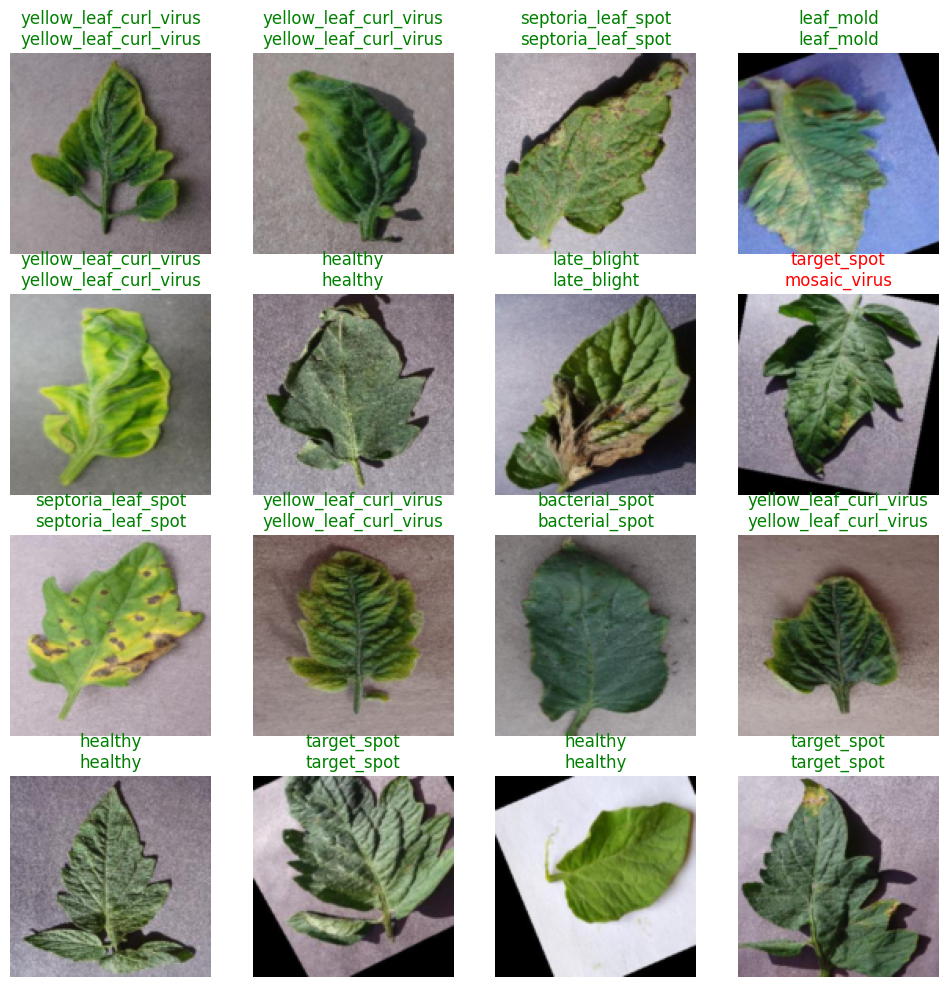

In [80]:
learn.show_results(max_n=16)